In [1]:
import numpy as np

In [2]:
def initialize_params(dims: int) -> np.ndarray:
    """根据输入的值生成对应尺寸的权重向量和偏置

    Args:
        dims (int): 特征的数量 (输入变量维度), 换句话说传入的 n

    Returns:
        np.ndarray: 含有权重和偏置的矩阵，其形状为 n + 1 x 1，n为特征的数量
    """
    params = np.zeros((dims+1, 1))

    return params

In [3]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    """Sigmoid 激活函数

    Args:
        x (np.ndarray): 输入的数组或数值

    Returns:
        np.ndarray: 经过 sigmoid 函数计算后的结果，值域为 (0, 1)
    """
    
    return 1 / (1 + np.exp(-x))

In [4]:
def logistic(X: np.ndarray, y: np.ndarray, params: np.ndarray) -> tuple:
    """计算对数几率回归的模型输出、损失函数和梯度

    Args:
        X (np.ndarray): 输入特征矩阵，形状为 (m, n)，m为样本数，n为特征数
        y (np.ndarray): 输出标签向量，形状为 (m, 1)
        params (np.ndarray): 权重和偏置的合并向量，形状为 (n + 1, 1)

    Returns:
        tuple: 包含以下三个元素:
            - a (np.ndarray): 激活后的预测值，形状为 (m, 1)
            - cost (float): 当前参数下的交叉熵损失值
            - grads (np.ndarray): 参数的梯度，形状与 params 一致 (n + 1, 1)
    """    
    # 1. 处理 X 的维度（添加偏置项列）
    X_b = np.hstack((X, np.ones((X.shape[0], 1))))

    # 2. 计算前向传播 (Z 和 A)
    a = sigmoid(X_b @ params)

    # 3. 计算 Cost，防止log(0)添加极小值
    epsilon = 1e-8
    cost = -np.mean((y * np.log(a + epsilon) + (1 - y) * np.log(1 - a + epsilon)))

    # 4. 计算反向传播梯度
    grads = X_b.T @ (a - y) / X_b.shape[0]
    
    return a, cost, grads

In [5]:
def logistic_train(X: np.ndarray, y: np.ndarray, learning_rate: float = 0.01, epochs: int = 2000) -> tuple:
    """执行对数几率回归的训练过程

    Args:
        X (np.ndarray): 训练集特征矩阵，形状为 (m, n)
        y (np.ndarray): 训练集标签向量，形状为 (m, 1)
        learning_rate (float): 学习率
        epochs (int): 迭代训练的轮数

    Returns:
        tuple: 包含以下三个元素:
            - cost_list (list): 记录每一步（或每几步）训练的损失值
            - params (np.ndarray): 训练完成后的最优参数，形状为 (n + 1, 1)
            - grads (np.ndarray): 最后一次迭代的梯度
    """

    # 调用 initialize_params 初始化参数
    params = initialize_params(X.shape[1])
    
    cost_list = []
    for epoch in range(epochs):
        # 调用 logistic 获取 a, cost, grads
        a, cost, grads = logistic(X, y, params)

        # 更新 params
        params = params - learning_rate * grads
        
        # 记录 cost
        cost_list.append(cost)

    return cost_list, params, grads

In [6]:
X = np.array([[1, 2, 3, 4, 5], [0.1, 0.2, 0.3, 0.6, 0.8]]).T
# y = np.array([2, 3, 4, 6, 8]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1]).reshape(-1, 1)
cost_list, params, grads = logistic_train(X, y)

In [14]:
def predict(X: np.ndarray, params: np.ndarray) -> np.ndarray:
    """基于训练好的参数对新数据进行预测

    Args:
        X (np.ndarray): 测试集特征矩阵，形状为 (m, n)
        params (np.ndarray): 训练好的模型参数，形状为 (n + 1, 1)

    Returns:
        np.ndarray: 预测的类别标签 (0 或 1)，形状为 (m, 1)
    """
    
    # 处理 X 的维度（与 logistic 中保持一致）
    X_b = np.hstack((X, np.ones((X.shape[0], 1))))

    # 计算概率值
    a = sigmoid(X_b @ params)

    # 根据阈值 (通常是 0.5) 将概率转换为类别 0 或 1
    y_prediction = np.where(a > 0.5, 1, 0)
    
    return y_prediction

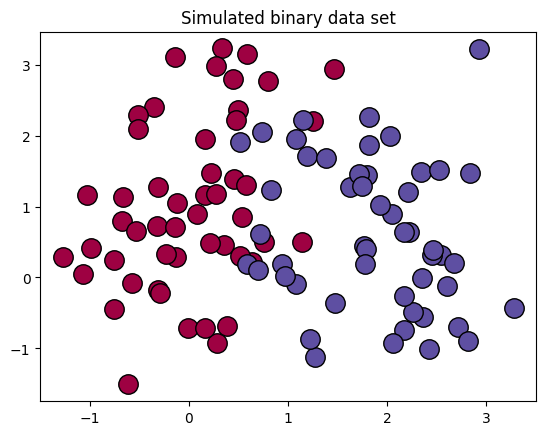

In [8]:
# 导入matplotlib绘图库
import matplotlib.pyplot as plt
# 导入生成分类数据函数
# from sklearn.datasets.samples_generator import make_classification
from sklearn.datasets import make_classification
# 生成100*2的模拟二分类数据集
X, labels = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=2)

# 设置随机数种子
rng = np.random.RandomState(2)
# 对生成的特征数据添加一组均匀分布噪声
X += 2 * rng.uniform(size=X.shape)
# 标签类别数
unique_lables = set(labels)
# 根据标签类别数设置颜色
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_lables)))
# 绘制模拟数据的散点图
for k,col in zip(unique_lables, colors):
    x_k=X[labels==k]
    plt.plot(x_k[:,0],x_k[:,1],'o',markerfacecolor=col,markeredgecolor="k",
             markersize=14)
plt.title('Simulated binary data set')
plt.show();

In [9]:
print(X.shape, labels.shape)

(100, 2) (100,)


In [10]:
labels = labels.reshape((-1, 1))
data = np.concatenate((X, labels), axis=1)
print(data.shape)

(100, 3)


In [11]:
# 训练集与测试集的简单划分
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], labels[:offset]
X_test, y_test = X[offset:], labels[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (90, 2)
X_test= (10, 2)
y_train= (90, 1)
y_test= (10, 1)


In [12]:
cost_list, params, grads = logistic_train(X_train, y_train, 0.01, 1000)

In [15]:
y_pred = predict(X_test, params)

In [16]:
from sklearn.metrics import accuracy_score, classification_report
# print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



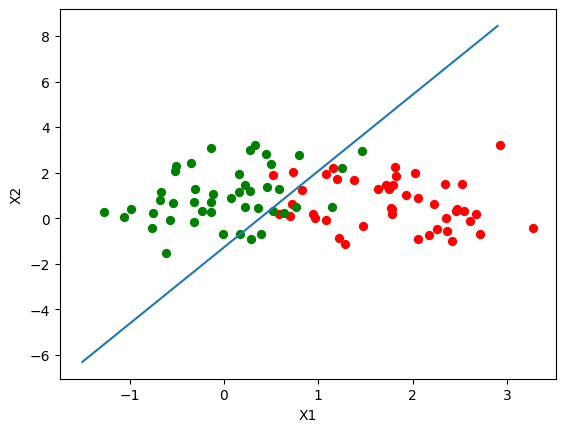

In [ ]:
### 绘制逻辑回归决策边界
def plot_decision_boundary(X_train, y_train, params):
    '''
    输入：
    X_train: 训练集输入
    y_train: 训练集标签
    params：训练好的模型参数
    输出：
    决策边界图
    '''
    # 训练样本量
    n = X_train.shape[0]
    # 初始化类别坐标点列表
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    # 获取两类坐标点并存入列表
    for i in range(n):
        if y_train[i] == 1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])
        else:
            xcord2.append(X_train[i][0])
            ycord2.append(X_train[i][1])
    # 创建绘图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # 绘制两类散点，以不同颜色表示
    ax.scatter(xcord1, ycord1,s=32, c='red')
    ax.scatter(xcord2, ycord2, s=32, c='green')
    # 取值范围
    x = np.arange(-1.5, 3, 0.1)
    # 决策边界公式
    y = (-params[0]* x - params[-1]) / params[1]
    # 绘制决策边界
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    
plot_decision_boundary(X_train, y_train, params)